# Basic sensitivity function and Transfer function calculation

We begin with three imports : pyplot, numpy and the sensitivity toolbox 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import sensitivity_toolbox as st

Let's define a Gravimeter with top rabi frequency rabi_max and interrogation time T.
We add as a parameter the pulses configuration as same for all pulses using the pulse_class parameter.

The Gravimiter class will take care of initializing the pi/2 - pi - pi/2 pulses. Then the interferometer class uses the init_sensitivity and init_rabi methods to compute the rabi_fun and sensitivity_fun methods. These two methods will be used to get access to the rabi intensity and sensitivity function over time.

The two initialization methods will be called automatically when a pulse is appended or when the interferometer is initialized. However, an external change of the pulses will need a manual call to these two methods in order to get the updated rabi_fun and sensitivity_fun.

In [5]:
rabi_max = 2*np.pi*100
T = 100e-3

interferometer = st.interferometers.Gravimeter(rabi_max=rabi_max, T=T,
                                               pulses_cfg=[(st.pulses.SquarePulse, {})])

 Then we create two time arrays spanning the interferometer length, with one centered on the middle of the interferometer for plotting.
 
 And we calculate the rabi frequency and sensitivity over time.

In [6]:
times = np.linspace(interferometer.begin, interferometer.end, 1000)
offset_times = times - 0.5*(interferometer.begin+interferometer.end)

rabi = interferometer.rabi_fun(times)
sensitivity = interferometer.sensitivity_fun(times)

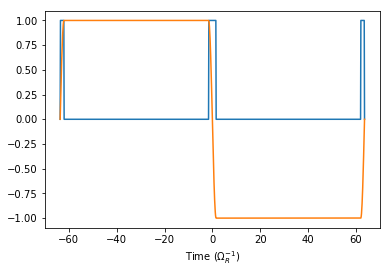

In [7]:
_, ax = plt.subplots()
ax.plot(offset_times*rabi_max, rabi/rabi.max(),
        label='Normalized rabi frequency')
ax.plot(offset_times*rabi_max, sensitivity/sensitivity.max(),
        label='Sensitivity function')
ax.set_xlabel(r'Time ($\Omega_R^{-1}$)')
plt.show()

Now let's calculate the transfer function. We will average the result using the average parameter with cut frequency and stride frequency as arguments.

In [8]:
freqs, H = interferometer.transfer_function(F_max=1e5, df=0.1,
                                            average=True, f_cut=rabi_max/10, f_stride=10)

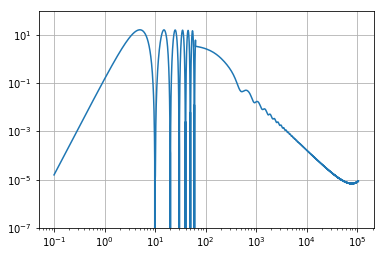

In [9]:
_, ax_tf = plt.subplots()
ax_tf.loglog(freqs, H**2)
ax_tf.set_ylim([1e-7, 100])
ax_tf.grid()
plt.show()